In [2]:
from welly import Well
from welly import Curve

In [4]:
well=Well.from_las('Data/LAS/8267_a0801_1996_comp.las')
well

Well(uwi: '', name: 'A08-01', 5 curves: ['GR', 'DT', 'RHOB', 'DRHO', 'NPHI'])

C:\Users\peter\anaconda3\envs\DrillingAnalytics\Lib\site-packages\welly\curve.py:470: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  if self.df.index.is_numeric() and not self.df.index.empty:


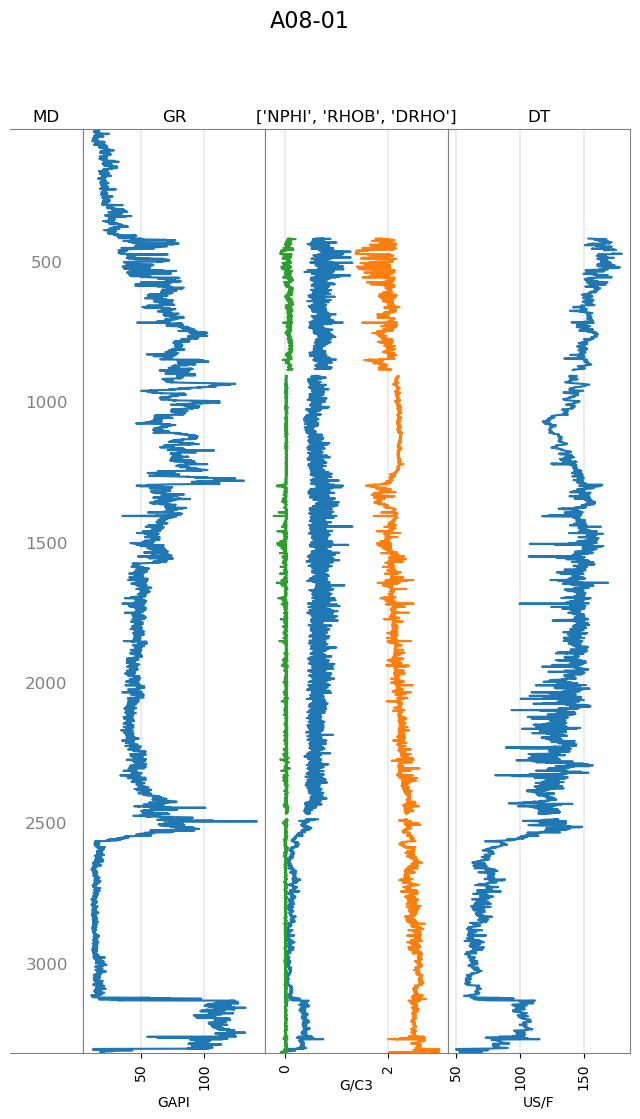

In [5]:
tracks =['MD','GR', ['NPHI','RHOB','DRHO'],'DT']
well.plot(tracks=tracks)

In [6]:
well.data['GR']

C:\Users\peter\anaconda3\envs\DrillingAnalytics\Lib\site-packages\welly\curve.py:470: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  if self.df.index.is_numeric() and not self.df.index.empty:
C:\Users\peter\anaconda3\envs\DrillingAnalytics\Lib\site-packages\welly\curve.py:342: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if self.dtypes[0] == float:
C:\Users\peter\anaconda3\envs\DrillingAnalytics\Lib\site-packages\welly\curve.py:347: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rows += s.format(depth, value[0])
C:\Users\peter\anaconda3\envs\DrillingAnalytics\L

Curve(mnemonic=GR, units=GAPI, start=29.6000, stop=3321.6001, step=0.0000, count=[32915])

In [7]:
gr=well.data['GR']
gr.describe()

GR
count  32915.0000000000
mean      51.2926343007
std       27.6309604582
min       10.7322940000
25%       24.5155510000
50%       48.9633640000
75%       70.7591780000
max      141.7033690000

In [8]:
gr=well.data['GR']
gr[2600:3000].describe()

GR
count  4000.0000000000
mean     14.2480287390
std       1.7059235562
min      10.8692070000
25%      13.0849197500
50%      13.8806150000
75%      15.0246997500
max      21.4723630000

In [9]:
import welly.quality as quality

test = {'Each':[quality.no_flat,
                quality.no_gaps,
                quality.not_empty
        ],
       'GR':[quality.all_above(25)
        ]}

from IPython.display import HTML
data_qc_table=well.qc_table_html(test)
HTML(data_qc_table)

In [10]:
test = {'Each':[quality.no_flat,
                quality.no_gaps,
                quality.not_empty,
                quality.fraction_not_nans
        ],
       'GR':[quality.all_above(25)
        ]}

data_qc_table=well.qc_table_html(test)
HTML(data_qc_table)

In [11]:
test = {'Each':[quality.no_flat,
                quality.no_gaps,
                quality.not_empty,
                quality.fraction_not_nans,
                quality.no_spikes(100),
                quality.count_spikes
        ],
       'GR':[quality.all_above(25)
        ]}

data_qc_table=well.qc_table_html(test)
HTML(data_qc_table)

In [12]:
gamma_dataframe=gr.df
gamma_dataframe

GR
DEPT                
29.6000          NaN
29.7000          NaN
29.8000          NaN
29.9000          NaN
30.0000          NaN
...              ...
3321.2001  18.328484
3321.3001  18.759823
3321.4001  19.257374
3321.5001  19.614250
3321.6001        NaN

[32921 rows x 1 columns]

In [13]:
well_dataframe=well.df()
well_dataframe

C:\Users\peter\anaconda3\envs\DrillingAnalytics\Lib\site-packages\welly\curve.py:470: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  if self.df.index.is_numeric() and not self.df.index.empty:


GR            DT         RHOB         DRHO         NPHI
DEPT                                                                     
29.6             NaN           NaN          NaN          NaN          NaN
30.6    15.696386000           NaN          NaN          NaN          NaN
31.6    14.627035000           NaN          NaN          NaN          NaN
32.6    15.284424000           NaN          NaN          NaN          NaN
33.6    16.003876000           NaN          NaN          NaN          NaN
...              ...           ...          ...          ...          ...
3317.6  18.677982329  64.584102495  2.134172767 -0.013612390 -0.014858995
3318.6  18.844643158  69.092365009  2.035248485  0.021715276 -0.014897020
3319.6  19.914344282  69.984509492  2.025431222  0.007160019 -0.014833986
3320.6  19.833988276           NaN          NaN          NaN          NaN
3321.6           NaN           NaN          NaN          NaN          NaN

[3293 rows x 5 columns]

In [15]:
len(gamma_dataframe)

32921

In [16]:
len(well_dataframe)

3293

In [17]:
class Curve:
    def __init__(self, well_name, well_location, curve_name, data):
        self.well_name = well_name
        self.well_location = well_location
        self.curve_name = curve_name
        self.data = data

    def get_well_name(self):
        return self.well_name

    def get_well_location(self):
        return self.well_location

    def get_curve_name(self):
        return self.curve_name

    def get_data(self, start=None, end=None):
        if start is None and end is None:
            return self.data
        elif start is None:
            return self.data[self.data.index <= end]
        elif end is None:
            return self.data[self.data.index >= start]
        else:
            return self.data[(self.data.index >= start) & (self.data.index <= end)]

In [19]:
curve=Curve("well 1","cerro dragon","gamma ray",gamma_dataframe)

In [20]:
print("Well name: "+curve.well_name+"\nLocation: "+curve.well_location+"\nCurve name: "+curve.curve_name+"\nData:\n"+str(curve.data))

Well name: well 1
Location: cerro dragon
Curve name: gamma ray
Data:
                  GR
DEPT                
29.6000          NaN
29.7000          NaN
29.8000          NaN
29.9000          NaN
30.0000          NaN
...              ...
3321.2001  18.328484
3321.3001  18.759823
3321.4001  19.257374
3321.5001  19.614250
3321.6001        NaN

[32921 rows x 1 columns]


In [21]:
print("Well name: "+curve.get_well_name()+"\nLocation: "+curve.get_well_location()+"\nCurve name: "+curve.get_curve_name()+"\nData:\n"+str(curve.get_data()))

Well name: well 1
Location: cerro dragon
Curve name: gamma ray
Data:
                  GR
DEPT                
29.6000          NaN
29.7000          NaN
29.8000          NaN
29.9000          NaN
30.0000          NaN
...              ...
3321.2001  18.328484
3321.3001  18.759823
3321.4001  19.257374
3321.5001  19.614250
3321.6001        NaN

[32921 rows x 1 columns]


In [23]:
print("Well name: "+curve.get_well_name()+"\nLocation: "+curve.get_well_location()+"\nCurve name: "+curve.get_curve_name()+"\nData:\n"+str(curve.get_data(30,3000)))

Well name: well 1
Location: cerro dragon
Curve name: gamma ray
Data:
                  GR
DEPT                
30.0000          NaN
30.1000    14.087420
30.2000    14.049314
30.3000    14.179976
30.4000    14.547157
...              ...
2999.5002  17.480877
2999.6002  17.625809
2999.7002  17.838318
2999.8002  18.096313
2999.9002  18.381496

[29700 rows x 1 columns]


In [24]:
print("Well name: "+curve.well_name+"\nLocation: "+curve.well_location+"\nCurve name: "+curve.curve_name+"\nData:\n"+str(curve.data[30:3000]))

Well name: well 1
Location: cerro dragon
Curve name: gamma ray
Data:
                  GR
DEPT                
30.0000          NaN
30.1000    14.087420
30.2000    14.049314
30.3000    14.179976
30.4000    14.547157
...              ...
2999.5002  17.480877
2999.6002  17.625809
2999.7002  17.838318
2999.8002  18.096313
2999.9002  18.381496

[29700 rows x 1 columns]


C:\Users\peter\AppData\Local\Temp\ipykernel_7932\2284762430.py:1: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  print("Well name: "+curve.well_name+"\nLocation: "+curve.well_location+"\nCurve name: "+curve.curve_name+"\nData:\n"+str(curve.data[30:3000]))


In [25]:
import lasio

las_file_path = 'Data/LAS/8267_a0801_1996_comp.las'

well = lasio.read(las_file_path)

df=well.df()
df[30:3000]

C:\Users\peter\AppData\Local\Temp\ipykernel_7932\3063501480.py:8: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  df[30:3000]


GR         DT      RHOB      DRHO      NPHI
DEPT                                                         
30.0000          NaN        NaN       NaN       NaN       NaN
30.1000    14.087420        NaN       NaN       NaN       NaN
30.2000    14.049314        NaN       NaN       NaN       NaN
30.3000    14.179976        NaN       NaN       NaN       NaN
30.4000    14.547157        NaN       NaN       NaN       NaN
...              ...        ...       ...       ...       ...
2999.5002  17.480877  65.258102  2.567376  0.017248  0.090406
2999.6002  17.625809  65.196838  2.562726  0.013381  0.088967
2999.7002  17.838318  65.136459  2.563357  0.007753  0.086688
2999.8002  18.096313  65.068756  2.569142  0.001628  0.084134
2999.9002  18.381496  64.974457  2.580817 -0.001973  0.081643

[29700 rows x 5 columns]

In [34]:
import pandas as pd

file_path = 'Data//ASCII//Swell-1A_AsciiDrillData_183.0-5006.csv'
df = pd.read_csv(file_path)
df.head()

DEPTH         TVD         ROP         WOH     WOB_AVG TORQUE_SURF  \
0           m           m         m/h        klbm        klbm     klbf.ft   
1         183         183     -999.25     -999.25     -999.25     -999.25   
2       183.5       183.5     -999.25     -999.25     -999.25     -999.25   
3         184         184     -999.25     -999.25     -999.25     -999.25   
4       184.5       184.5       20.15      167.76           0        2.02   

   TORQUE_MIN  TORQUE_MAX TOT BIT_RPM      FLOWIN  ... Temperature Out  \
0     klbf.ft     klbf.ft       1/min         gpm  ...            degC   
1     -999.25     -999.25     -999.25     -999.25  ...         -999.25   
2     -999.25     -999.25     -999.25     -999.25  ...         -999.25   
3     -999.25     -999.25     -999.25     -999.25  ...         -999.25   
4        1.84        2.24          30      203.31  ...            24.4   

  D-Exponent Bit Wear Total RPM [Surface + DHM] Stand Pipe Pressure  \
0                 Euc                     1/min                 psi   
1             -999.25                   -999.25             -999.25   
2             -999.25                   -999.25             -999.25   
3             -999.25                   -999.25             -999.25   
4             -999.25                        30               34.12   

    PUMP_TIME TotalRotaryTime    Bit Time     Bit Run  \
0           h               h           h           m   
1     -999.25         -999.25     -999.25     -999.25   
2     -999.25         -999.25     -999.25     -999.25   
3     -999.25         -999.25     -999.25     -999.25   
4         0.3            4.92        0.05        0.75   

  TotalSurfaceCumRevOnBottom       PSACTIVE  
0                        Euc            bbl  
1                    -999.25        -999.25  
2                    -999.25        -999.25  
3                    -999.25        -999.25  
4                        136        1668.97  

[5 rows x 28 columns]

In [35]:
columns=df.columns
file_path = 'Data//ASCII//Swell-1A_AsciiDrillData_183.0-5006.csv'
df = pd.read_csv(file_path, skiprows=1)
df.head()

m           m.1         m/h        klbm        klbm.1     klbf.ft  \
0       183.0         183.0     -999.25     -999.25       -999.25     -999.25   
1       183.5         183.5     -999.25     -999.25       -999.25     -999.25   
2       184.0         184.0     -999.25     -999.25       -999.25     -999.25   
3       184.5         184.5       20.15      167.76          0.00        2.02   
4       185.0         185.0       29.60      166.69          0.00        2.84   

      klbf.ft.1     klbf.ft.2   1/min         gpm  ...        degC.1  \
0       -999.25       -999.25 -999.25     -999.25  ...       -999.25   
1       -999.25       -999.25 -999.25     -999.25  ...       -999.25   
2       -999.25       -999.25 -999.25     -999.25  ...       -999.25   
3          1.84          2.24   30.00      203.31  ...         24.40   
4          2.29          3.23   30.00      202.25  ...         24.40   

          Euc  1/min.5         psi.1           h           h.1           h.2  \
0     -999.25  -999.25       -999.25     -999.25       -999.25       -999.25   
1     -999.25  -999.25       -999.25     -999.25       -999.25       -999.25   
2     -999.25  -999.25       -999.25     -999.25       -999.25       -999.25   
3     -999.25    30.00         34.12        0.30          4.92          0.05   
4     -999.25    30.00         32.59        0.32          4.94          0.07   

            m.2         Euc.1            bbl  
0       -999.25       -999.25        -999.25  
1       -999.25       -999.25        -999.25  
2       -999.25       -999.25        -999.25  
3          0.75        136.00        1668.97  
4          1.34        168.00        1669.34  

[5 rows x 28 columns]

In [36]:
df.columns=columns
df.head()

DEPTH    TVD     ROP     WOH  WOB_AVG  TORQUE_SURF  TORQUE_MIN  TORQUE_MAX  \
0  183.0  183.0 -999.25 -999.25  -999.25      -999.25     -999.25     -999.25   
1  183.5  183.5 -999.25 -999.25  -999.25      -999.25     -999.25     -999.25   
2  184.0  184.0 -999.25 -999.25  -999.25      -999.25     -999.25     -999.25   
3  184.5  184.5   20.15  167.76     0.00         2.02        1.84        2.24   
4  185.0  185.0   29.60  166.69     0.00         2.84        2.29        3.23   

   TOT BIT_RPM  FLOWIN  ...  Temperature Out  D-Exponent Bit Wear  \
0      -999.25 -999.25  ...          -999.25              -999.25   
1      -999.25 -999.25  ...          -999.25              -999.25   
2      -999.25 -999.25  ...          -999.25              -999.25   
3        30.00  203.31  ...            24.40              -999.25   
4        30.00  202.25  ...            24.40              -999.25   

   Total RPM [Surface + DHM]  Stand Pipe Pressure  PUMP_TIME  TotalRotaryTime  \
0                    -999.25              -999.25    -999.25          -999.25   
1                    -999.25              -999.25    -999.25          -999.25   
2                    -999.25              -999.25    -999.25          -999.25   
3                      30.00                34.12       0.30             4.92   
4                      30.00                32.59       0.32             4.94   

   Bit Time  Bit Run  TotalSurfaceCumRevOnBottom  PSACTIVE  
0   -999.25  -999.25                     -999.25   -999.25  
1   -999.25  -999.25                     -999.25   -999.25  
2   -999.25  -999.25                     -999.25   -999.25  
3      0.05     0.75                      136.00   1668.97  
4      0.07     1.34                      168.00   1669.34  

[5 rows x 28 columns]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

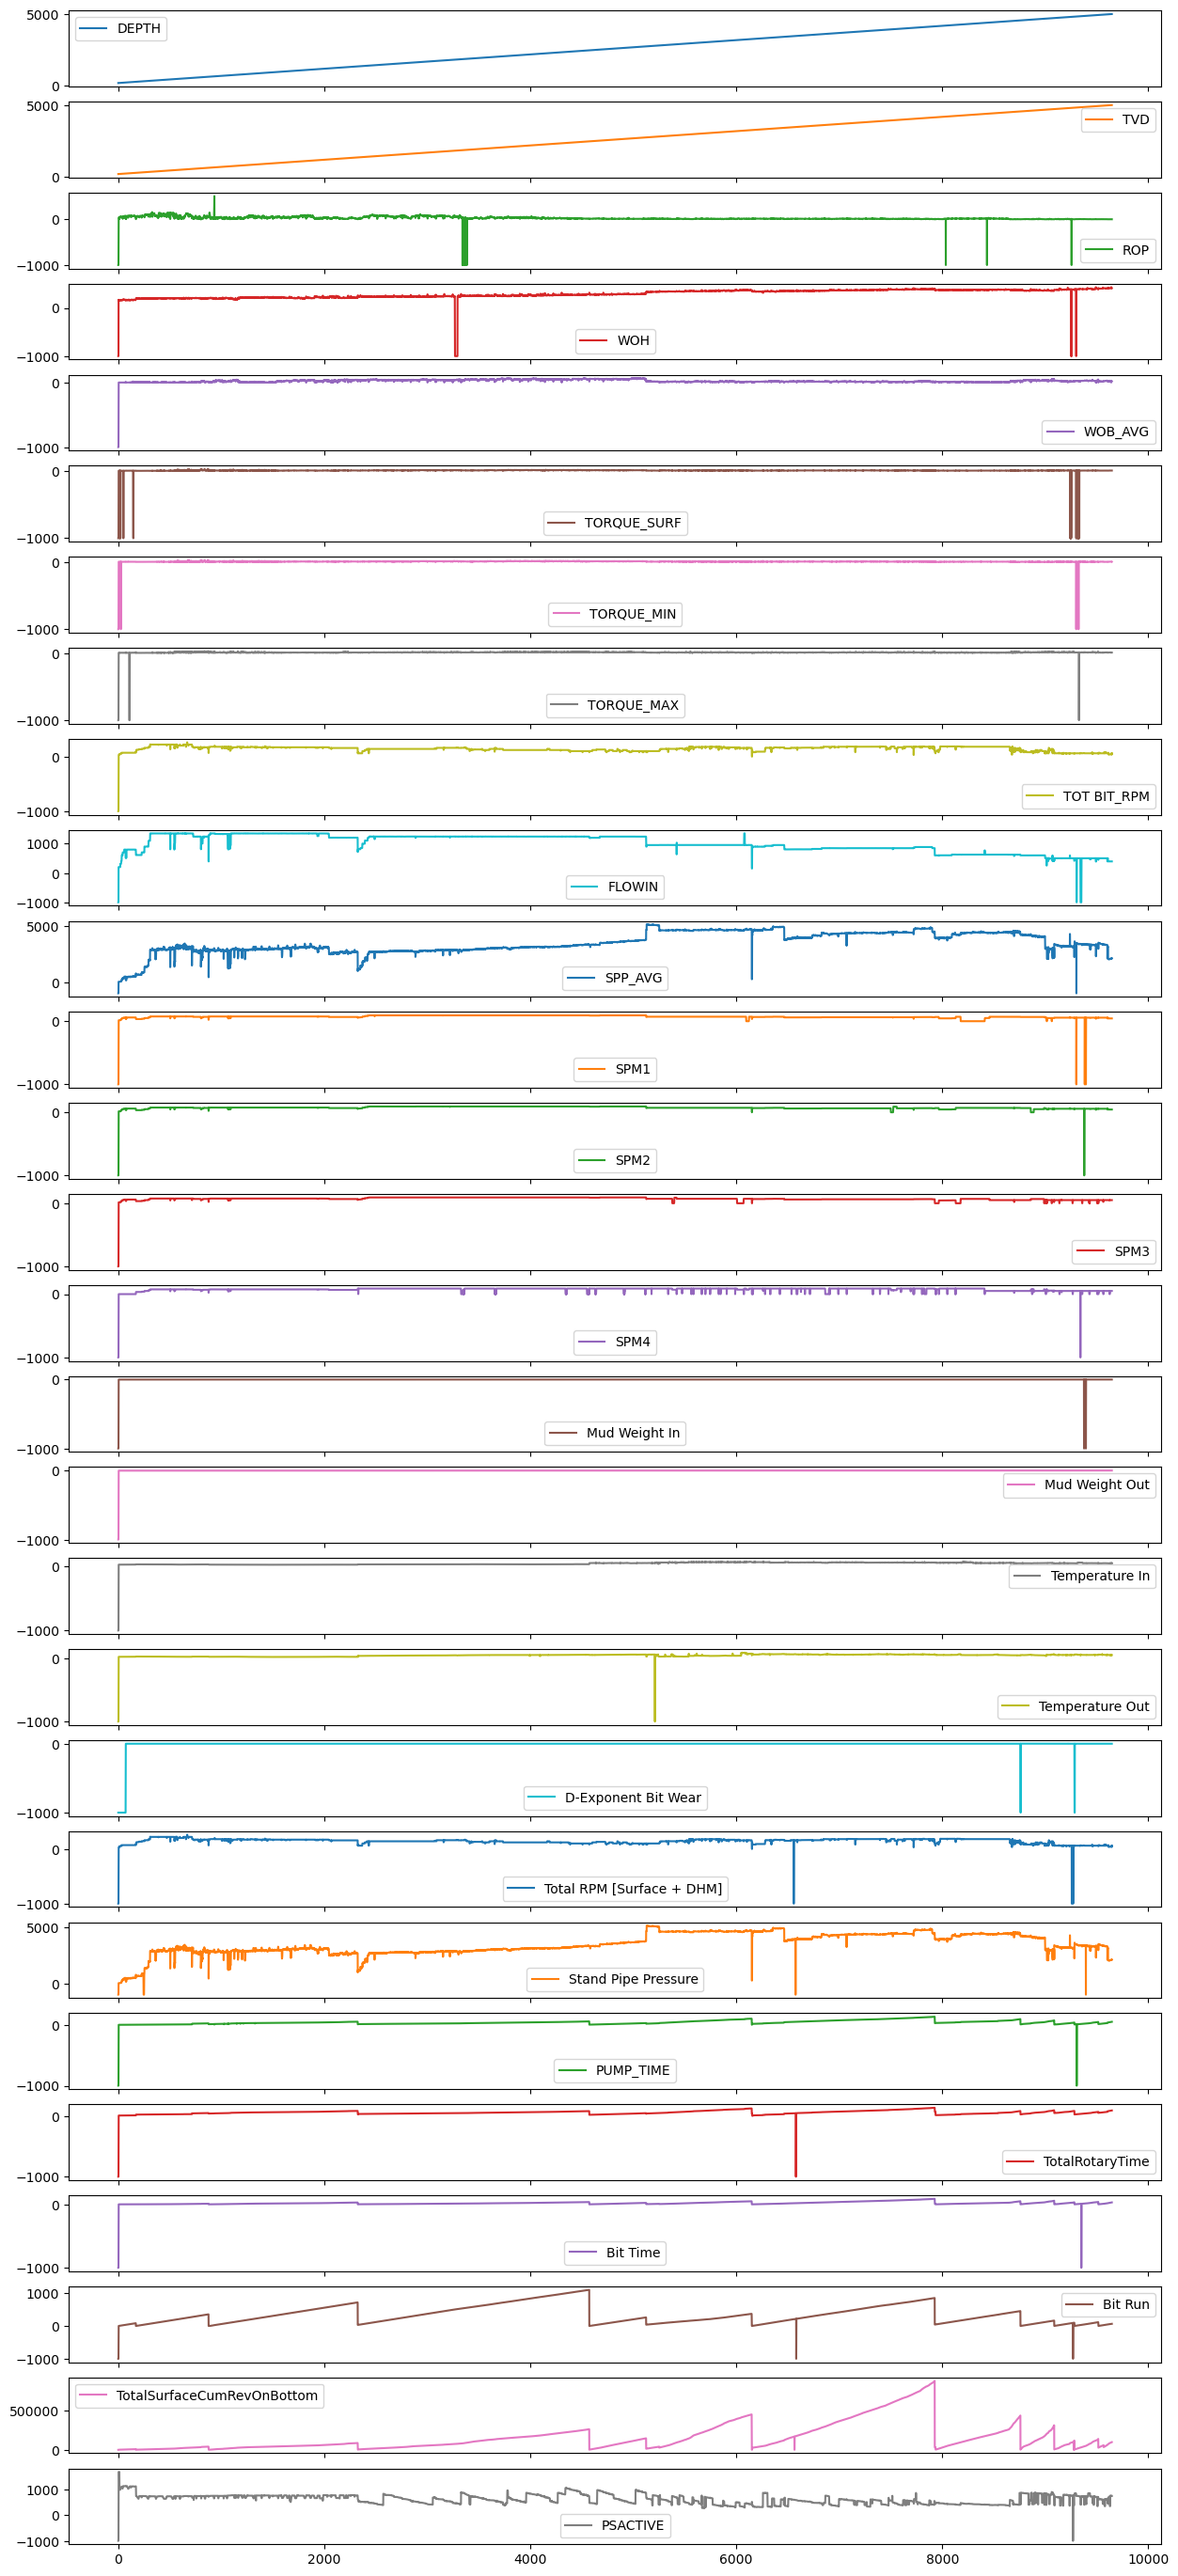

In [37]:
df.plot(subplots=True, figsize=(15,35))

In [38]:
import numpy as np

df.replace(-999.25, np.nan, inplace=True)
df.head()

DEPTH    TVD    ROP     WOH  WOB_AVG  TORQUE_SURF  TORQUE_MIN  TORQUE_MAX  \
0  183.0  183.0    NaN     NaN      NaN          NaN         NaN         NaN   
1  183.5  183.5    NaN     NaN      NaN          NaN         NaN         NaN   
2  184.0  184.0    NaN     NaN      NaN          NaN         NaN         NaN   
3  184.5  184.5  20.15  167.76      0.0         2.02        1.84        2.24   
4  185.0  185.0  29.60  166.69      0.0         2.84        2.29        3.23   

   TOT BIT_RPM  FLOWIN  ...  Temperature Out  D-Exponent Bit Wear  \
0          NaN     NaN  ...              NaN                  NaN   
1          NaN     NaN  ...              NaN                  NaN   
2          NaN     NaN  ...              NaN                  NaN   
3         30.0  203.31  ...             24.4                  NaN   
4         30.0  202.25  ...             24.4                  NaN   

   Total RPM [Surface + DHM]  Stand Pipe Pressure  PUMP_TIME  TotalRotaryTime  \
0                        NaN                  NaN        NaN              NaN   
1                        NaN                  NaN        NaN              NaN   
2                        NaN                  NaN        NaN              NaN   
3                       30.0                34.12       0.30             4.92   
4                       30.0                32.59       0.32             4.94   

   Bit Time  Bit Run  TotalSurfaceCumRevOnBottom  PSACTIVE  
0       NaN      NaN                         NaN       NaN  
1       NaN      NaN                         NaN       NaN  
2       NaN      NaN                         NaN       NaN  
3      0.05     0.75                       136.0   1668.97  
4      0.07     1.34                       168.0   1669.34  

[5 rows x 28 columns]

In [40]:
print("Number of missing readings")
for column in df.columns:
    count_nan = df[column].isna().sum()
    print(f"{column}: {count_nan}")

Number of missing readings
DEPTH: 0
TVD: 0
ROP: 22
WOH: 32
WOB_AVG: 3
TORQUE_SURF: 23
TORQUE_MIN: 6
TORQUE_MAX: 9
TOT BIT_RPM: 3
FLOWIN: 14
SPP_AVG: 4
SPM1: 6
SPM2: 4
SPM3: 3
SPM4: 5
Mud Weight In: 5
Mud Weight Out: 3
Temperature In: 3
Temperature Out: 4
D-Exponent Bit Wear: 79
Total RPM [Surface + DHM]: 6
Stand Pipe Pressure: 13
PUMP_TIME: 4
TotalRotaryTime: 4
Bit Time: 4
Bit Run: 5
TotalSurfaceCumRevOnBottom: 5
PSACTIVE: 4


In [43]:
import pandas as pd
import numpy as np

# Function to replace one NaN with the average of the surrounding values
def replace_one_nan_with_avg(df, column_name):
    for i in range(1, len(df[column_name]) - 1):
        if pd.isna(df.at[i, column_name]):
            if not pd.isna(df.at[i - 1, column_name]) and not pd.isna(df.at[i + 1, column_name]):
                df.at[i, column_name] = (df.at[i - 1, column_name] + df.at[i + 1, column_name]) / 2
            else:
                df.at[i, column_name] = np.nan
    return df

# Store the initial NaN count for each column in a dictionary
initial_nan_dic = df.isna().sum().to_dict()

# Replace NaNs in specified columns
for column in columns:  # 'columns' should be defined elsewhere with the list of columns
    replace_one_nan_with_avg(df, column)

# Display the original and new NaN counts
for column in df.columns:
    count_nan = df[column].isna().sum()
    print(f"Column: {column}: new NaN {count_nan}, old NaN {initial_nan_dic[column]}")


Column: DEPTH: new NaN 0, old NaN 0
Column: TVD: new NaN 0, old NaN 0
Column: ROP: new NaN 15, old NaN 15
Column: WOH: new NaN 29, old NaN 29
Column: WOB_AVG: new NaN 3, old NaN 3
Column: TORQUE_SURF: new NaN 7, old NaN 7
Column: TORQUE_MIN: new NaN 3, old NaN 3
Column: TORQUE_MAX: new NaN 8, old NaN 8
Column: TOT BIT_RPM: new NaN 3, old NaN 3
Column: FLOWIN: new NaN 13, old NaN 13
Column: SPP_AVG: new NaN 3, old NaN 3
Column: SPM1: new NaN 3, old NaN 3
Column: SPM2: new NaN 3, old NaN 3
Column: SPM3: new NaN 3, old NaN 3
Column: SPM4: new NaN 5, old NaN 5
Column: Mud Weight In: new NaN 3, old NaN 3
Column: Mud Weight Out: new NaN 3, old NaN 3
Column: Temperature In: new NaN 3, old NaN 3
Column: Temperature Out: new NaN 3, old NaN 3
Column: D-Exponent Bit Wear: new NaN 79, old NaN 79
Column: Total RPM [Surface + DHM]: new NaN 3, old NaN 3
Column: Stand Pipe Pressure: new NaN 12, old NaN 12
Column: PUMP_TIME: new NaN 3, old NaN 3
Column: TotalRotaryTime: new NaN 3, old NaN 3
Column: Bit

C:\Users\peter\AppData\Local\Temp\ipykernel_7932\1277422118.py:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[column_name][i] = next_value
C:\Users\peter\AppData\Local\Temp\ipykernel_7932\1277422118.py:21: FutureWarning: ChainedAssignm

Column: DEPTH: new NaN 0, old NaN 0
Column: TVD: new NaN 0, old NaN 0
Column: ROP: new NaN 0, old NaN 15
Column: WOH: new NaN 0, old NaN 29
Column: WOB_AVG: new NaN 0, old NaN 3
Column: TORQUE_SURF: new NaN 0, old NaN 7
Column: TORQUE_MIN: new NaN 0, old NaN 3
Column: TORQUE_MAX: new NaN 0, old NaN 8
Column: TOT BIT_RPM: new NaN 0, old NaN 3
Column: FLOWIN: new NaN 0, old NaN 13
Column: SPP_AVG: new NaN 0, old NaN 3
Column: SPM1: new NaN 0, old NaN 3
Column: SPM2: new NaN 0, old NaN 3
Column: SPM3: new NaN 0, old NaN 3
Column: SPM4: new NaN 0, old NaN 5
Column: Mud Weight In: new NaN 0, old NaN 3
Column: Mud Weight Out: new NaN 0, old NaN 3
Column: Temperature In: new NaN 0, old NaN 3
Column: Temperature Out: new NaN 0, old NaN 3
Column: D-Exponent Bit Wear: new NaN 0, old NaN 79
Column: Total RPM [Surface + DHM]: new NaN 0, old NaN 3
Column: Stand Pipe Pressure: new NaN 0, old NaN 12
Column: PUMP_TIME: new NaN 0, old NaN 3
Column: TotalRotaryTime: new NaN 0, old NaN 3
Column: Bit Time

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

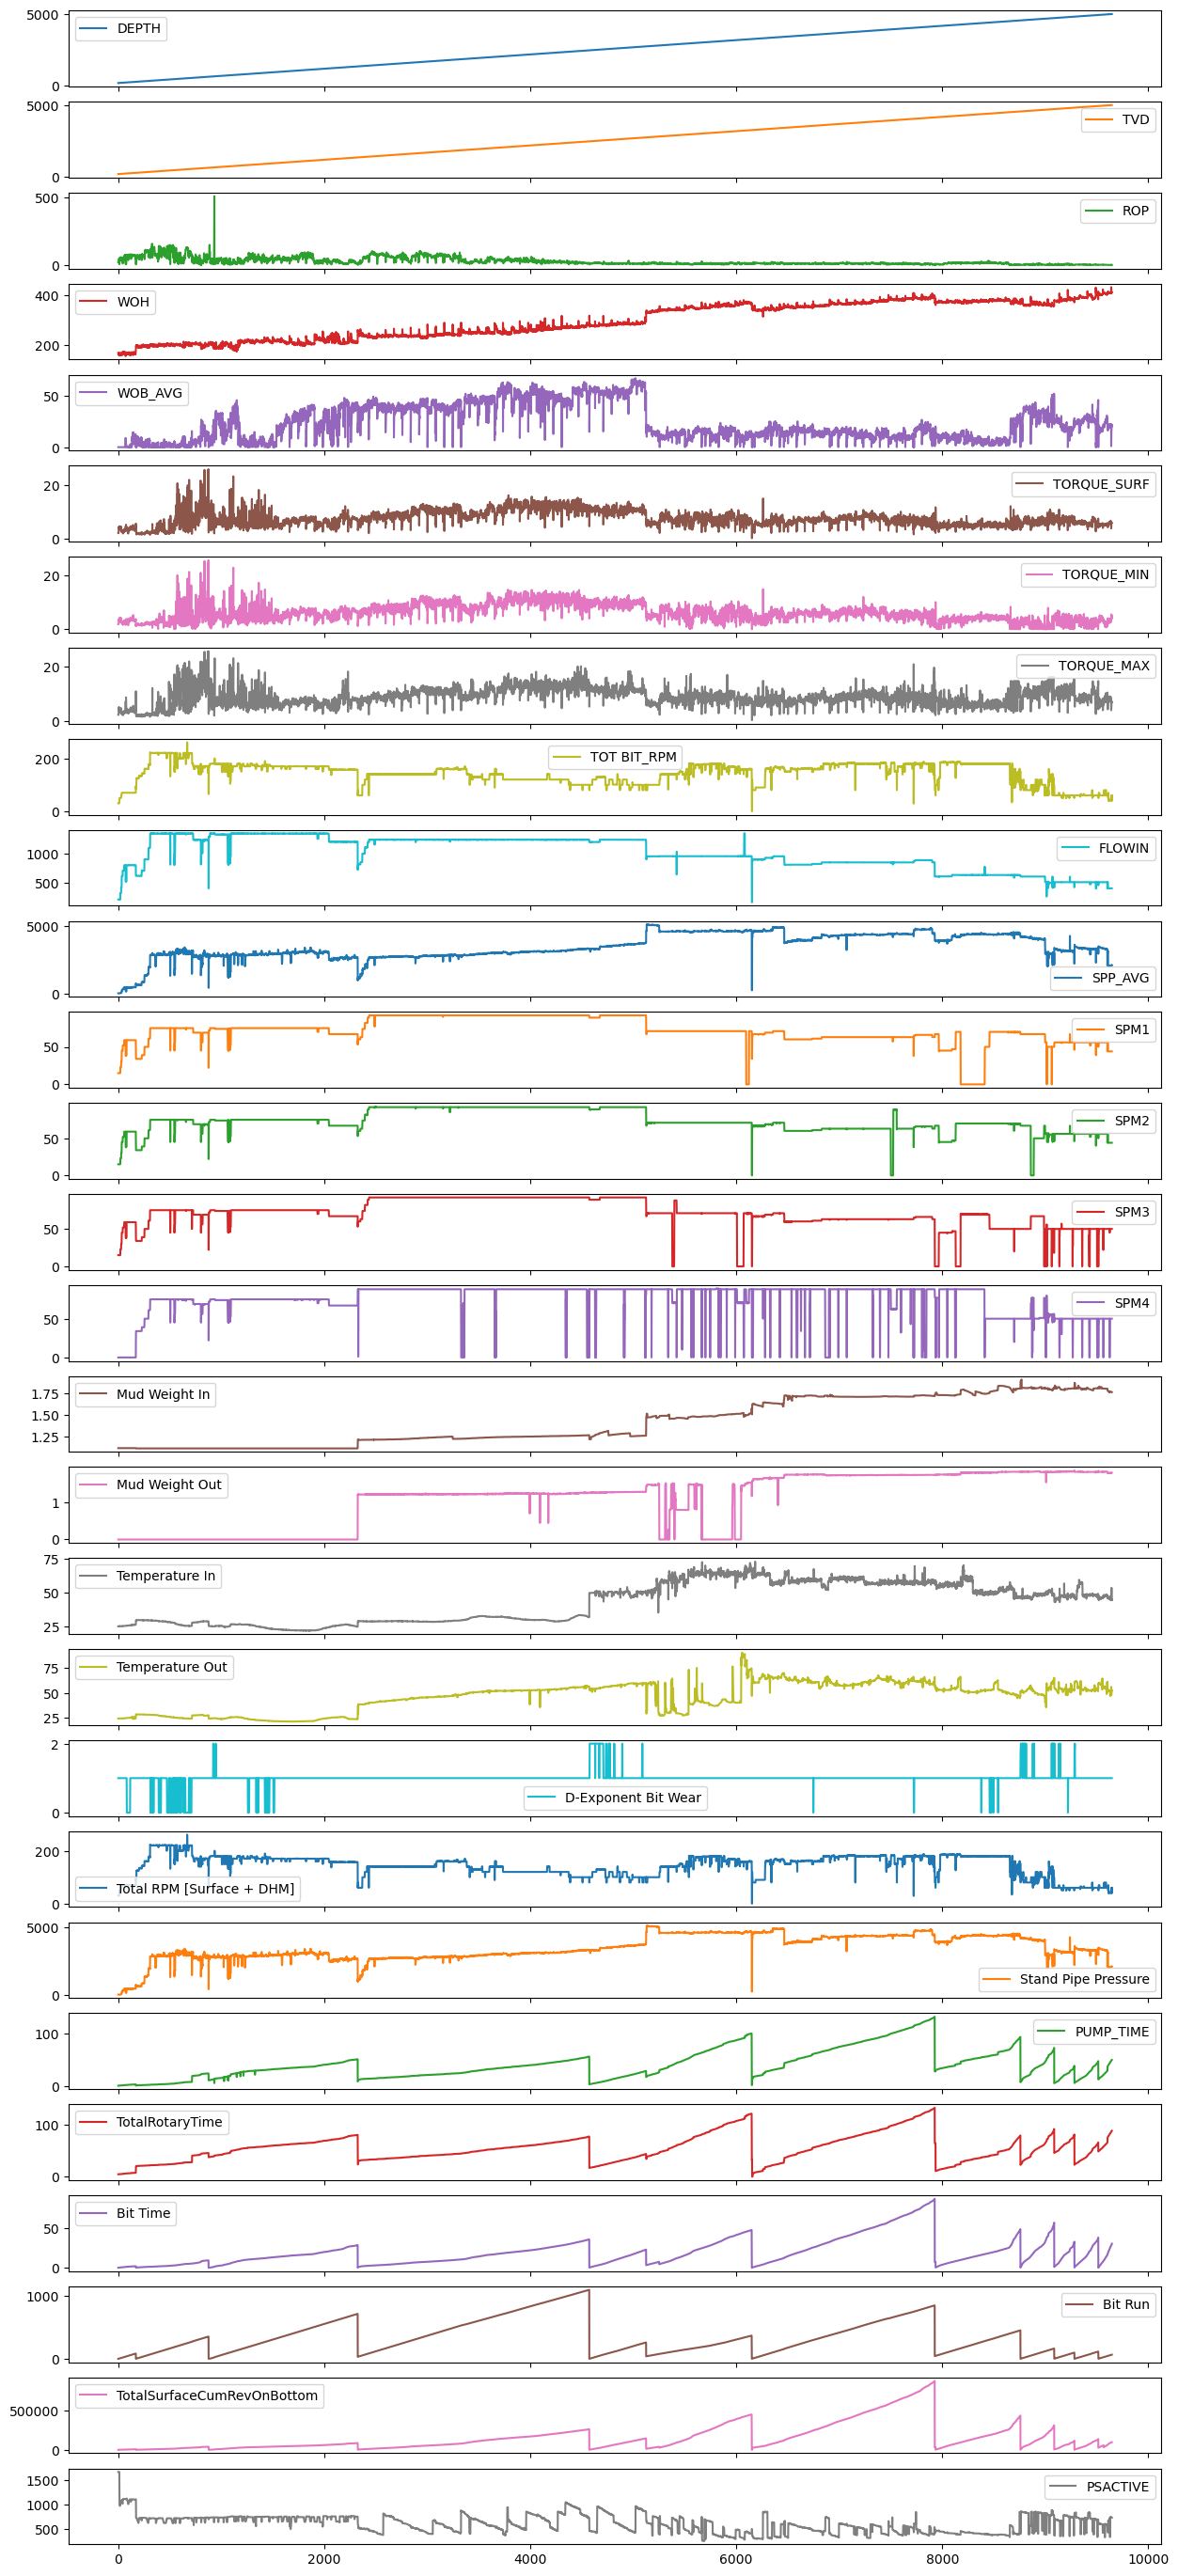

In [46]:
def replace_many_nan_with_avg(df, column_name):
    for i in range(len(df[column_name])):
        if pd.isna(df[column_name][i]):
            prev_value = None
            next_value = None
            for j in range(i-1, -1, -1):
                if not pd.isna(df[column_name][j]):
                    prev_value = df[column_name][j]
                    break
            for j in range(i+1, len(df[column_name])):
                if not pd.isna(df[column_name][j]):
                    next_value = df[column_name][j]
                    break
            if prev_value is None and next_value is None:
                df[column_name][i] = np.nan
            elif prev_value is None:
                df[column_name][i] = next_value
            elif next_value is None:
                df[column_name][i] = prev_value
            else:
                df[column_name][i] = (prev_value + next_value) / 2
    return df

for column in columns:
    replace_many_nan_with_avg(df,column)

for column in df.columns:
    count_nan = df[column].isna().sum()
    print(f"Column: {column}: new NaN {count_nan}, old NaN {initial_nan_dic[column]}")


df.head()

df.plot(subplots=True, figsize=(15,35))

Column: DEPTH: new NaN 0, old NaN 0
Column: TVD: new NaN 0, old NaN 0
Column: ROP: new NaN 0, old NaN 0
Column: WOH: new NaN 0, old NaN 0
Column: WOB_AVG: new NaN 0, old NaN 0
Column: TORQUE_SURF: new NaN 0, old NaN 0
Column: TORQUE_MIN: new NaN 0, old NaN 0
Column: TORQUE_MAX: new NaN 0, old NaN 0
Column: TOT BIT_RPM: new NaN 0, old NaN 0
Column: FLOWIN: new NaN 0, old NaN 0
Column: SPP_AVG: new NaN 0, old NaN 0
Column: SPM1: new NaN 0, old NaN 0
Column: SPM2: new NaN 0, old NaN 0
Column: SPM3: new NaN 0, old NaN 0
Column: SPM4: new NaN 0, old NaN 0
Column: Mud Weight In: new NaN 0, old NaN 0
Column: Mud Weight Out: new NaN 0, old NaN 0
Column: Temperature In: new NaN 0, old NaN 0
Column: Temperature Out: new NaN 0, old NaN 0
Column: D-Exponent Bit Wear: new NaN 0, old NaN 0
Column: Total RPM [Surface + DHM]: new NaN 0, old NaN 0
Column: Stand Pipe Pressure: new NaN 0, old NaN 0
Column: PUMP_TIME: new NaN 0, old NaN 0
Column: TotalRotaryTime: new NaN 0, old NaN 0
Column: Bit Time: new

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

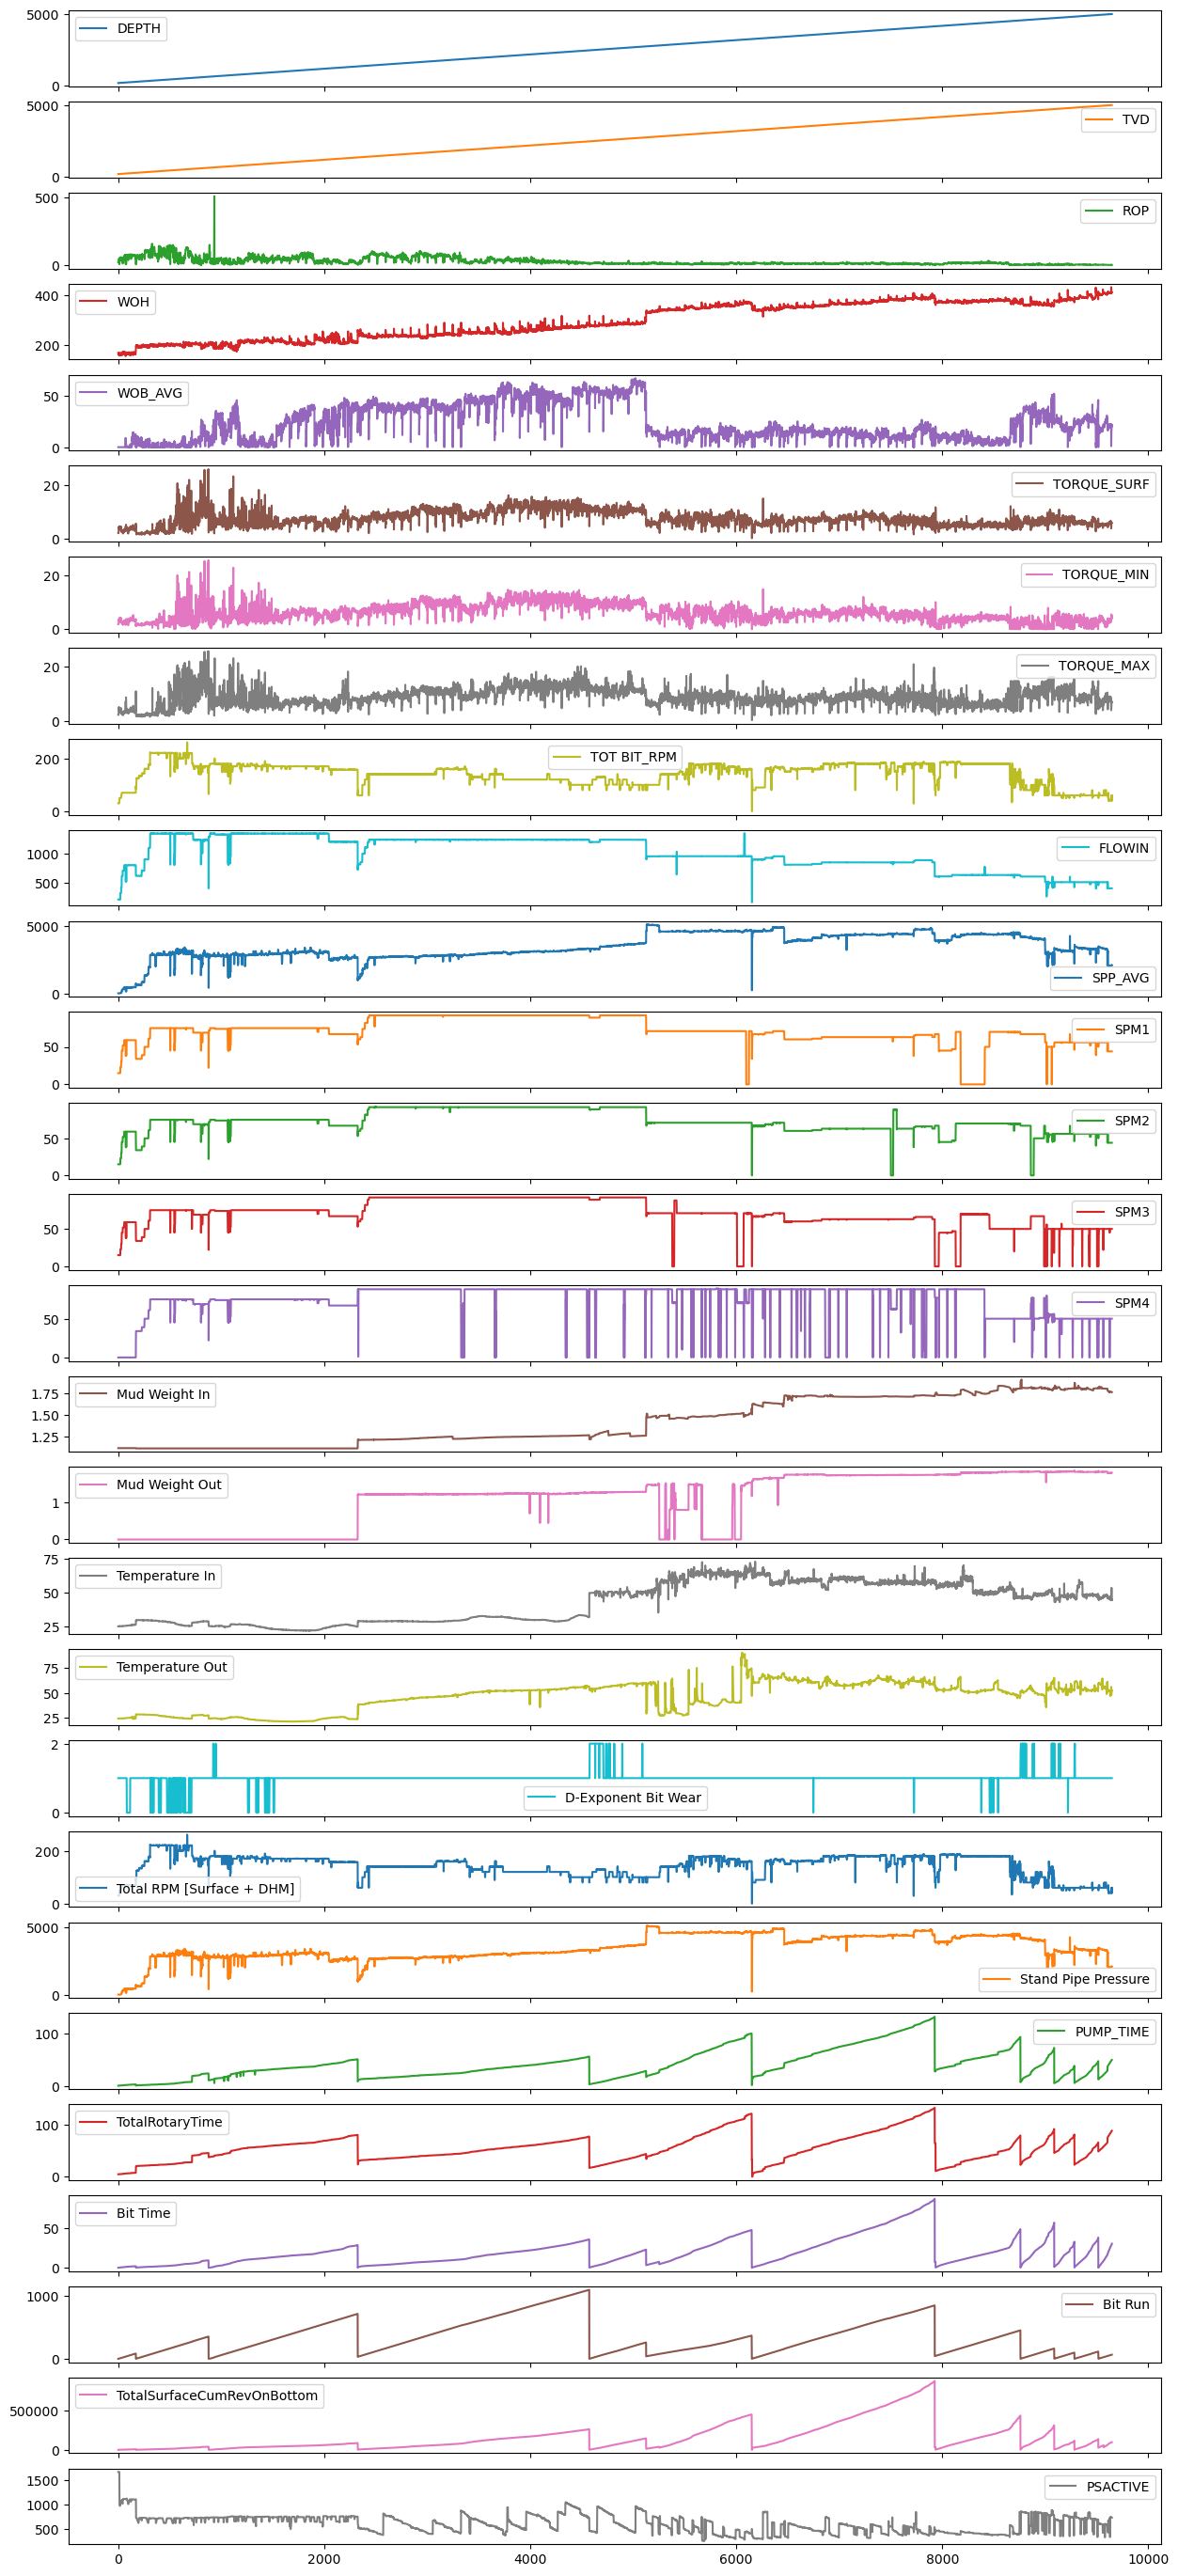

In [48]:
import pandas as pd
import numpy as np

# Function to replace many NaNs with the average of the surrounding values
def replace_many_nan_with_avg(df, column_name):
    for i in range(len(df[column_name])):
        if pd.isna(df.at[i, column_name]):  # Use df.at for getting values
            prev_value = None
            next_value = None

            # Find the previous non-NaN value
            for j in range(i - 1, -1, -1):
                if not pd.isna(df.at[j, column_name]):  # Use df.at for getting values
                    prev_value = df.at[j, column_name]
                    break

            # Find the next non-NaN value
            for j in range(i + 1, len(df[column_name])):
                if not pd.isna(df.at[j, column_name]):  # Use df.at for getting values
                    next_value = df.at[j, column_name]
                    break

            # Replace NaN based on available values
            if prev_value is None and next_value is None:
                df.at[i, column_name] = np.nan  # No surrounding values
            elif prev_value is None:
                df.at[i, column_name] = next_value  # Only next value is available
            elif next_value is None:
                df.at[i, column_name] = prev_value  # Only previous value is available
            else:
                df.at[i, column_name] = (prev_value + next_value) / 2  # Average of both
    return df

# Store the initial NaN count for each column
initial_nan_dic = df.isna().sum().to_dict()

# Apply the NaN replacement function to the specified columns
for column in columns:  # 'columns' should contain the list of relevant columns
    replace_many_nan_with_avg(df, column)

# Display the new and old NaN counts for comparison
for column in df.columns:
    count_nan = df[column].isna().sum()
    print(f"Column: {column}: new NaN {count_nan}, old NaN {initial_nan_dic[column]}")

# Display the head of the DataFrame
df.head()

# Plot the data in the DataFrame
df.plot(subplots=True, figsize=(15, 35))

<Axes: >

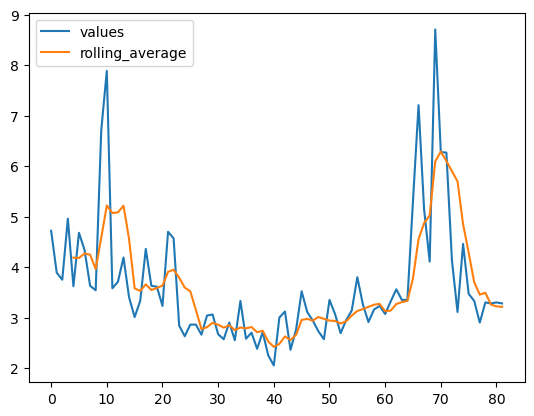

In [49]:
import pandas as pd

# create a sample dataframe
dft = pd.DataFrame({'values': [4.72, 3.89, 3.75, 4.96, 3.62, 4.68, 4.34, 3.63, 3.54, 6.71, 7.89, 3.58, 3.71, 4.19, 3.4, 3.01, 3.33, 4.36, 3.63, 3.61, 3.23, 4.7, 
                              4.57, 2.84, 2.63, 2.86, 2.86, 2.66, 3.04, 3.06, 2.67, 2.57, 2.9, 2.55, 3.33, 2.58, 2.7, 2.38, 2.71, 2.25, 2.05, 3, 3.12, 2.36, 2.76, 
                              3.52, 3.11, 2.94, 2.73, 2.57, 3.35, 3.07, 2.69, 2.95, 3.14, 3.8, 3.26, 2.91, 3.16, 3.23, 3.07, 3.32, 3.56, 3.35, 3.35, 5.31,7.21, 
                              5.14, 4.11, 8.71, 6.28, 6.27, 4.13, 3.11, 4.46, 3.47, 3.33, 2.9, 3.3, 3.28, 3.3, 3.28]})

# define the window size
WS = 5

# calculate the rolling average
dft['rolling_average'] = dft['values'].rolling(window=WS).mean()

dft.plot()

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

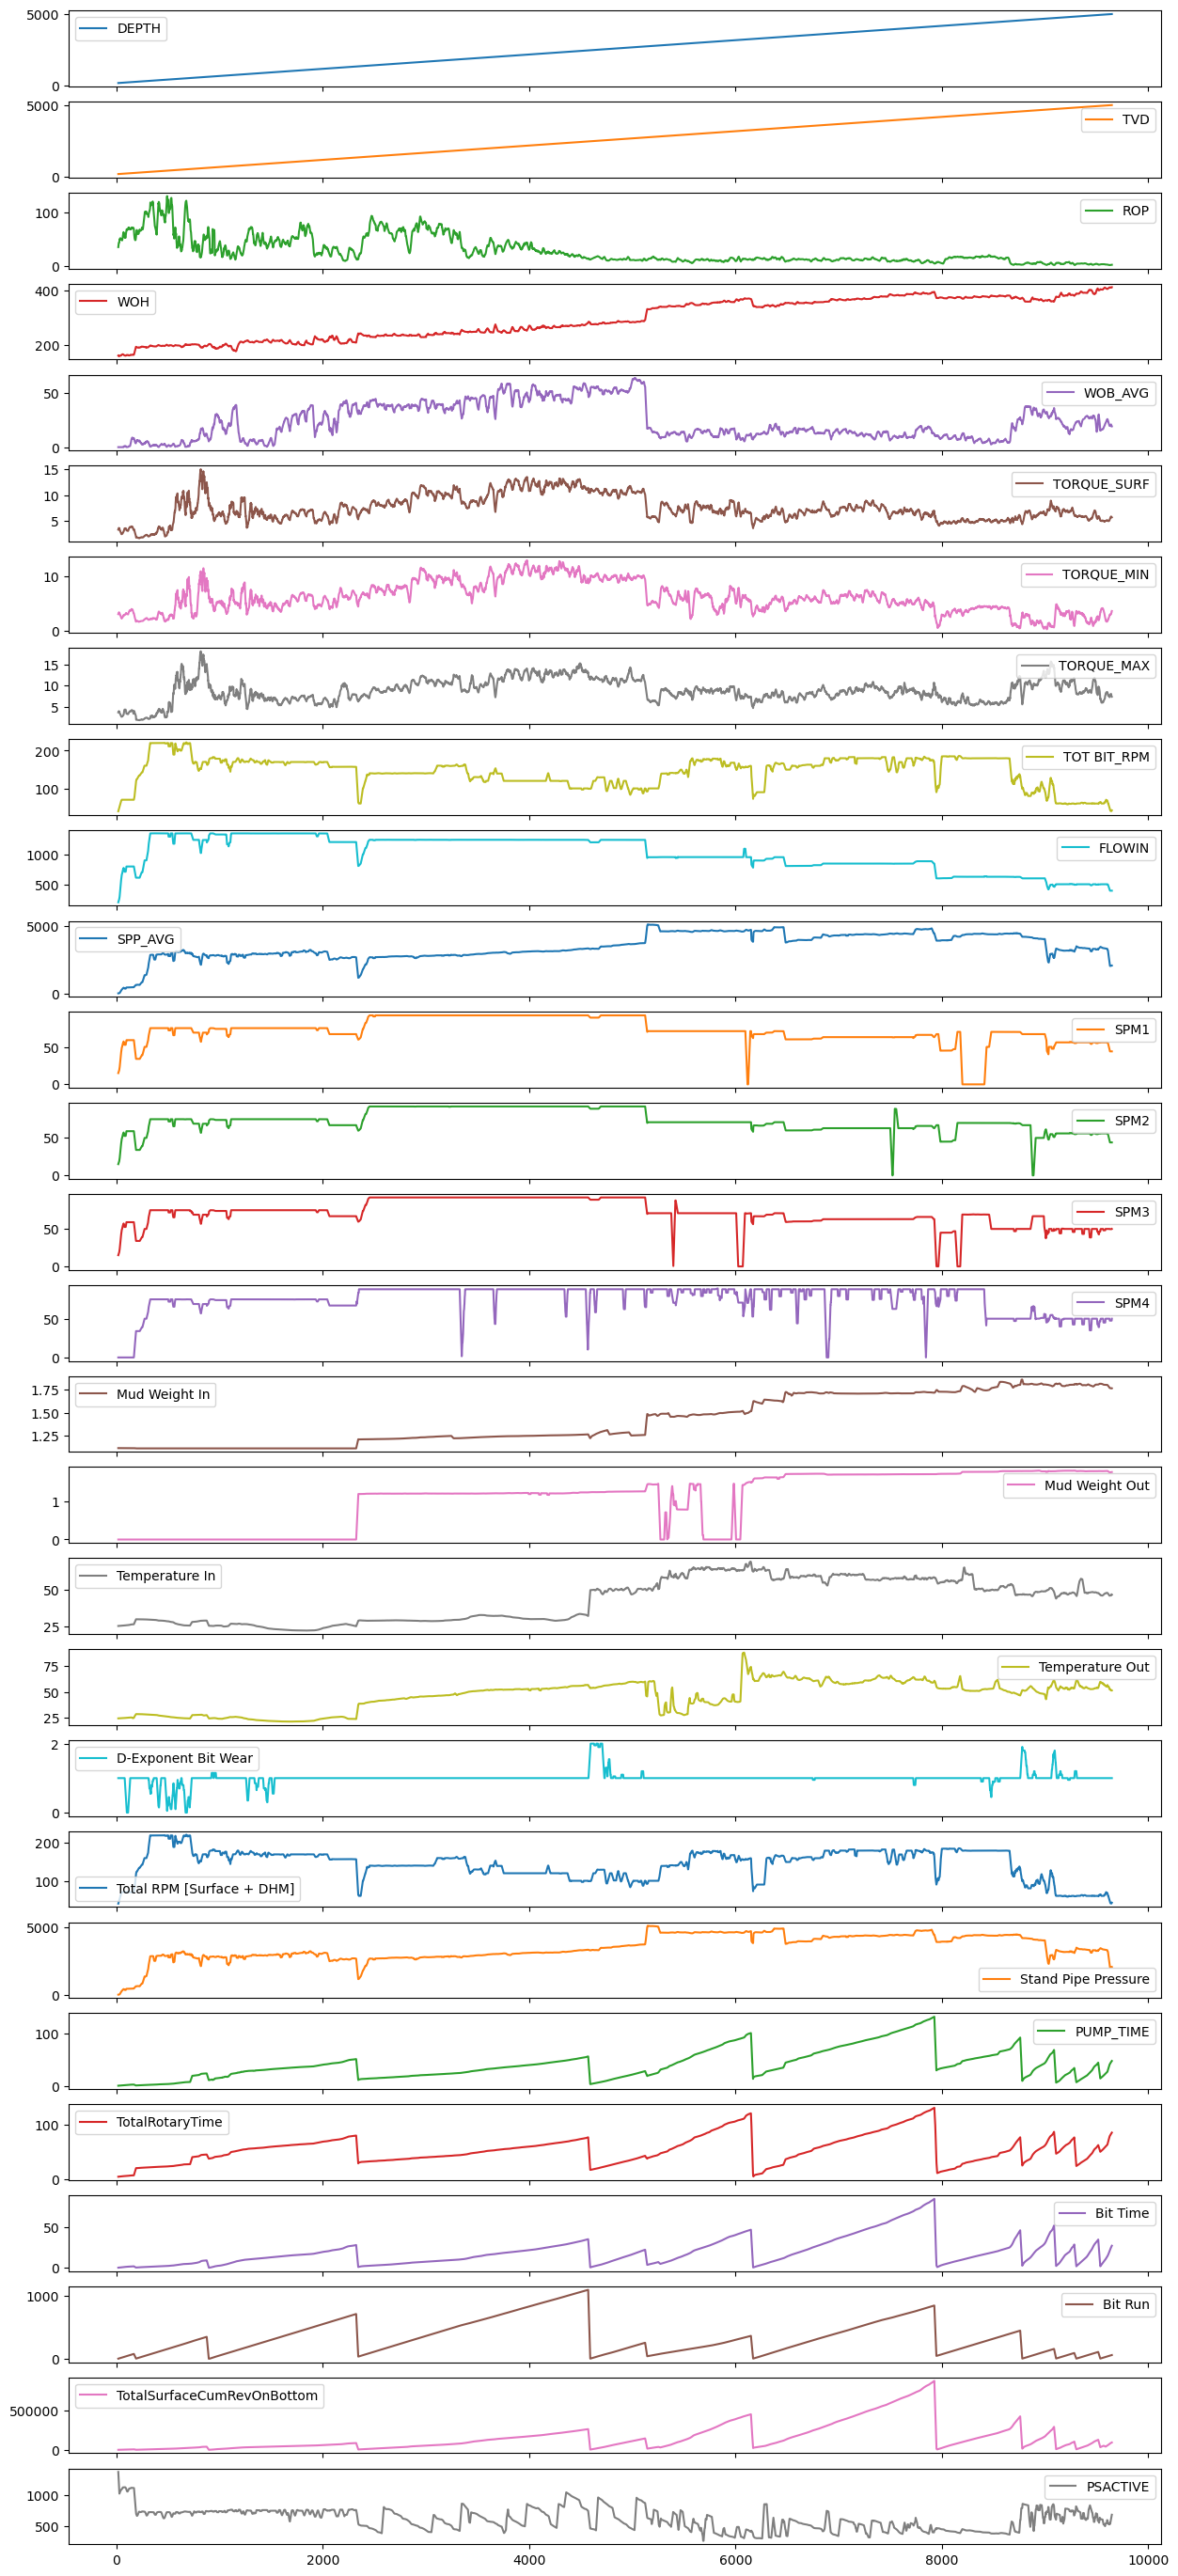

In [50]:
# define the window size
WS = 20

dfs=pd.DataFrame()
for column in columns:
    dfs[column] = df[column].rolling(window=WS).mean()

dfs.plot(subplots=True, figsize=(15,35))

In [75]:
def read_las_files(file_list):
    dfs=pd.DataFrame()
    for file in file_list:
        well = lasio.read('Data/LAS/'+file)
        df = well.df()
        dfs=pd.concat([dfs, df], ignore_index=True)
    return dfs


file_list=['210915_IOA_07_BDC-2-04_TD_695.las','210916_IOA_08_BDC-2-04_TD_695.las','210917_IOA_09_BDC-2-04_TD_1171.las','210918_IOA_10_BDC-2-04_TD_1551.las',
        '210919_IOA_11_BDC-2-04_TD_2047.las','210920_IOA_12_BDC-2-04_TD_2261.las']
df=read_las_files(file_list)

In [76]:
print("Column Names:")
print(df.columns)

Column Names:
Index(['HDEP', 'HDTVD', 'LAGDEPTH', 'BPOS', 'TFHA', 'TFBA', 'FTAA', 'FRSA',
       'RPMTOTAL', 'SPP1', 'SPP2', 'FRPI', 'P1RT', 'P2RT', 'P3RT', 'P4RT',
       'CSTK', 'FFIA', 'HOB', 'FFOA', 'PITVOLTOTAL', 'AUXILARYTOTAL', 'DMIA',
       'TMIA', 'CMIA', 'CVE1CORDENS', 'TMOA', 'CMOA', 'TRIPTANK', 'FGHA',
       '1C1', '1C2', '1C3', '1C4I', '1C4N', '1C5I', '1C5O', 'GASHYDNINAVG',
       '2C1', '2C2', '2C3', '2C4I', '2C4N', '2C5O', '2C5I', 'TFCP', 'DI01',
       'DI02', 'DI03', 'DI04'],
      dtype='object')


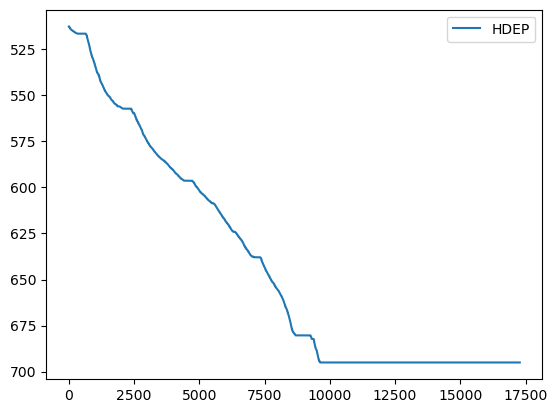

In [67]:
import matplotlib.pyplot as plt 

ax=df.plot(y='HDEP',use_index=True)
ax.invert_yaxis()
plt.show()

In [68]:
df['HDEP'].is_monotonic_increasing

True

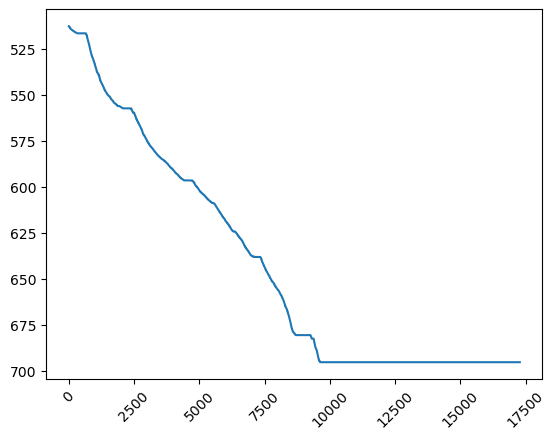

In [69]:
ax = df.loc['00:00:00.22-09-21':, 'HDEP'].plot()
ax.invert_yaxis()
plt.xticks(rotation=45)
plt.show()

Original DataFrame:
       HDEP
Index      
1      1000
2      1050
3      1100
4      1080
5      1150
6      1200
7      1190
8      1250
9      1300
10     1280

Non-Monotonic Mask:
Index
1     False
2     False
3     False
4      True
5     False
6     False
7      True
8     False
9     False
10     True
Name: HDEP, dtype: bool


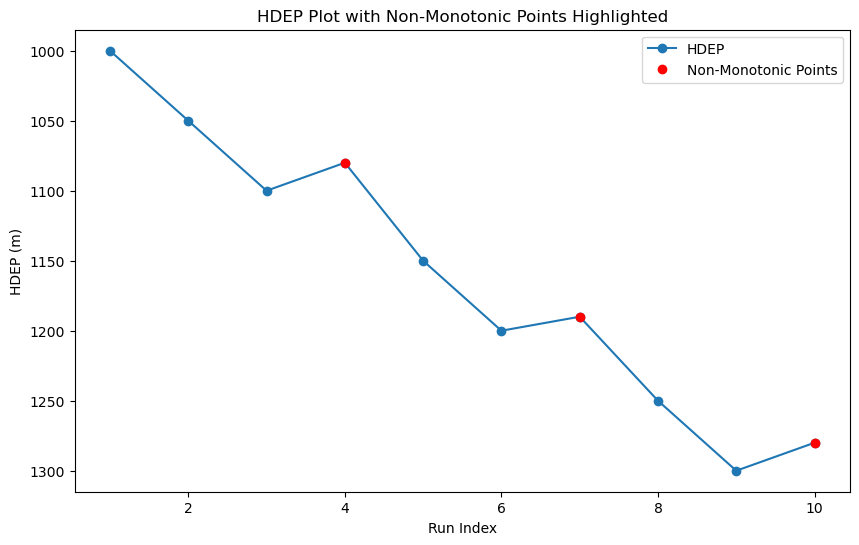

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample DataFrame with 'HDEP' values (Hole Depth)
data = {
    'Index': range(1, 11),
    'HDEP': [1000, 1050, 1100, 1080, 1150, 1200, 1190, 1250, 1300, 1280]
}

# Create the DataFrame
df = pd.DataFrame(data)
df.set_index('Index', inplace=True)

# Display the original DataFrame
print("Original DataFrame:")
print(df)

# Identify non-monotonic increasing points
# A point is non-monotonic if it is less than or equal to the previous point
non_monotonic_mask = df['HDEP'] <= df['HDEP'].shift(1)

# Display the mask
print("\nNon-Monotonic Mask:")
print(non_monotonic_mask)

# Plotting 'HDEP'
ax = df.plot(y='HDEP', use_index=True, label='HDEP', figsize=(10, 6), marker='o')

# Highlight the non-monotonic points
ax.plot(df.index[non_monotonic_mask], df['HDEP'][non_monotonic_mask], 'ro', label='Non-Monotonic Points')

# Invert the y-axis to represent depth correctly
ax.invert_yaxis()

# Add labels and title
ax.set_ylabel('HDEP (m)')
ax.set_xlabel('Run Index')
ax.set_title('HDEP Plot with Non-Monotonic Points Highlighted')

# Show legend
ax.legend()

# Display the plot
plt.show()


<Axes: ylabel='Density'>

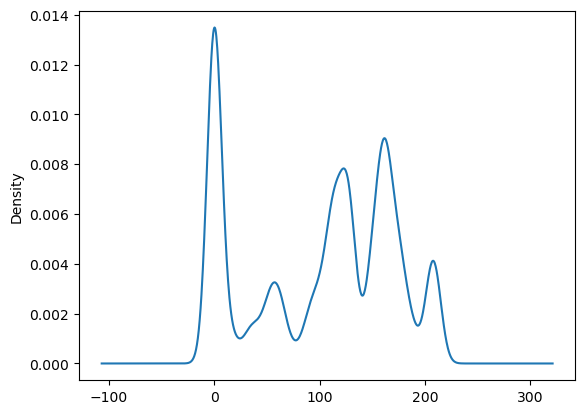

In [77]:
df['RPMTOTAL'].plot(kind='kde')

<Axes: ylabel='Density'>

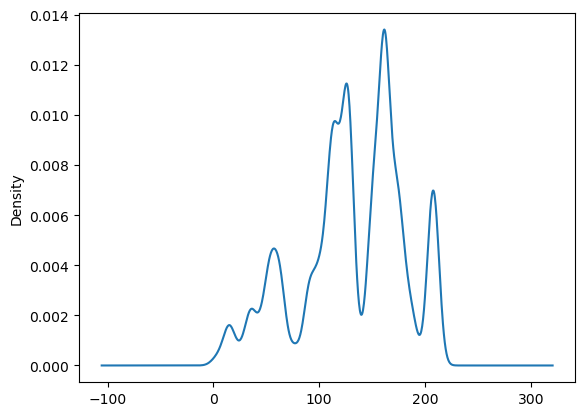

In [79]:
df_new = df.loc[df['RPMTOTAL'] > 0]
df_new['RPMTOTAL'].plot(kind='kde')

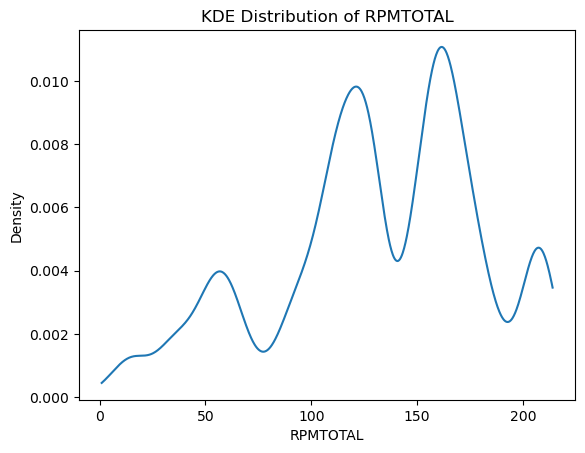

In [80]:
from sklearn.neighbors import KernelDensity

# Extract the RPMTOTAL column
rpmtotal = df_new['RPMTOTAL'].values.reshape(-1, 1)

# Fit the kernel density estimator
kde = KernelDensity(kernel='gaussian', bandwidth=8).fit(rpmtotal)

# Create a range of values to evaluate the estimator
x = np.linspace(rpmtotal.min(), rpmtotal.max(), 1000).reshape(-1, 1)

# Evaluate the estimator at the given values
y = np.exp(kde.score_samples(x))

# Plot the KDE distribution
plt.plot(x, y)
plt.xlabel('RPMTOTAL')
plt.ylabel('Density')
plt.title('KDE Distribution of RPMTOTAL')
plt.show()

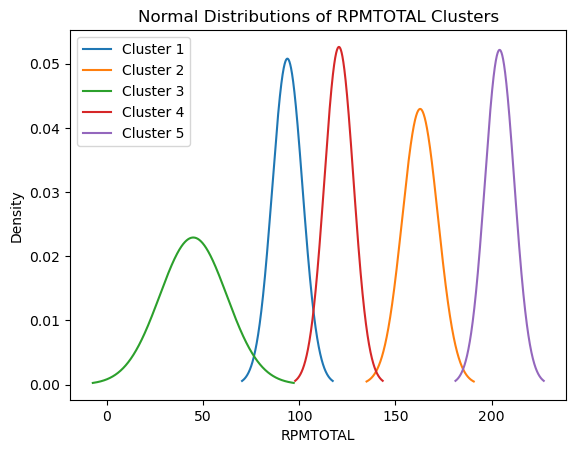

In [81]:
from sklearn.cluster import KMeans

# Fit the KMeans estimator
kmeans = KMeans(n_clusters=5,n_init=10).fit(rpmtotal)

# Get the cluster labels
labels = kmeans.labels_

# Get the indices of the clusters
cluster_indices = [np.where(labels == i)[0] for i in range(kmeans.n_clusters)]

# Segregate the clusters into smaller arrays
clusters = [rpmtotal[indices] for indices in cluster_indices]

# Plot the normal distributions for each array
for i, cluster in enumerate(clusters):
    mu, std = cluster.mean(), cluster.std()
    x = np.linspace(mu - 3 * std, mu + 3 * std, 1000)
    y = np.exp(-0.5 * ((x - mu) / std) ** 2) / (std * np.sqrt(2 * np.pi))
    plt.plot(x, y, label=f'Cluster {i+1}')
plt.xlabel('RPMTOTAL')
plt.ylabel('Density')
plt.title('Normal Distributions of RPMTOTAL Clusters')
plt.legend()
plt.show()


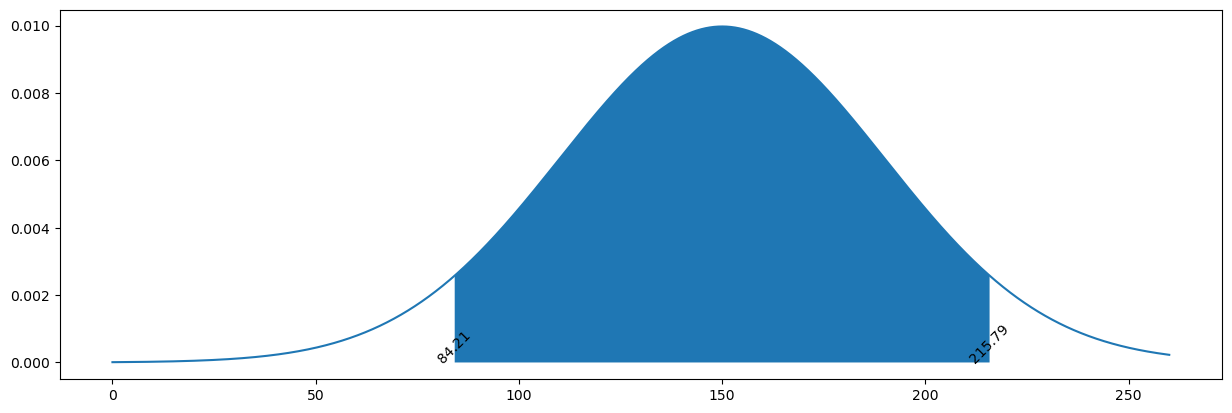

In [82]:
from scipy import stats

def plot_normal_distribution(mean, std, ci):
    x_axis = np.arange(0, 260, 0.001)
    pdf = stats.norm.pdf(x_axis, mean, std)

    fig, ax = plt.subplots()
    fig.set_figwidth(15) # Set the width of the figure to 10 inches
    ax.plot(x_axis, pdf)

    std_lim = stats.norm.ppf(1 - (1 - ci) / 2) # 95% CI
    low = mean - std_lim * std
    high = mean + std_lim * std

    ax.fill_between(x_axis, pdf, where=(low < x_axis) & (x_axis < high))
    ax.text(low, 0, f'{low:.2f}', ha='center',rotation=45)
    ax.text(high, 0, f'{high:.2f}', ha='center',rotation=45)

    plt.show()
    
plot_normal_distribution(150, 40, 0.90)

In [83]:
for i, cluster in enumerate(clusters):
    mu, std = cluster.mean(), cluster.std()
    print(f'Cluster {i+1}: Mean = {mu:.2f}, Standard Deviation = {std:.2f}')

Cluster 1: Mean = 93.81, Standard Deviation = 7.86
Cluster 2: Mean = 162.86, Standard Deviation = 9.29
Cluster 3: Mean = 44.86, Standard Deviation = 17.41
Cluster 4: Mean = 120.62, Standard Deviation = 7.58
Cluster 5: Mean = 204.18, Standard Deviation = 7.65


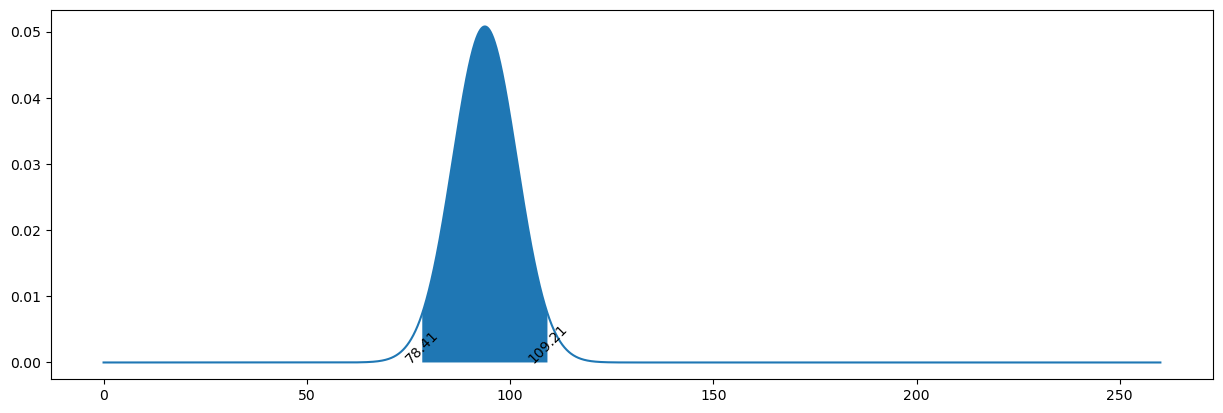

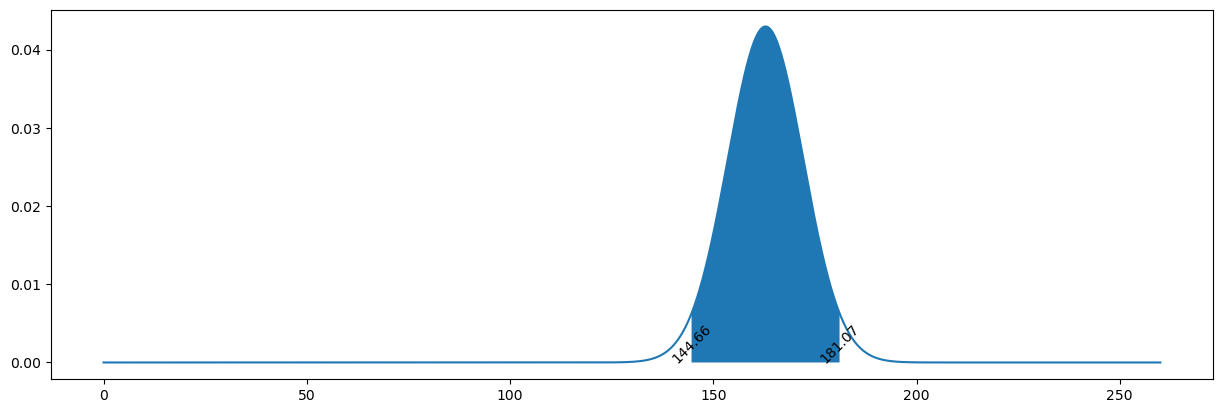

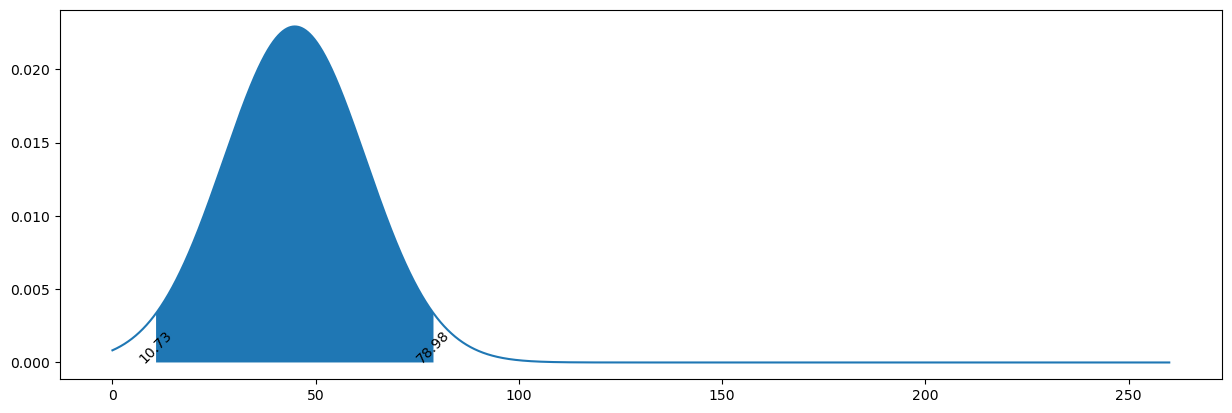

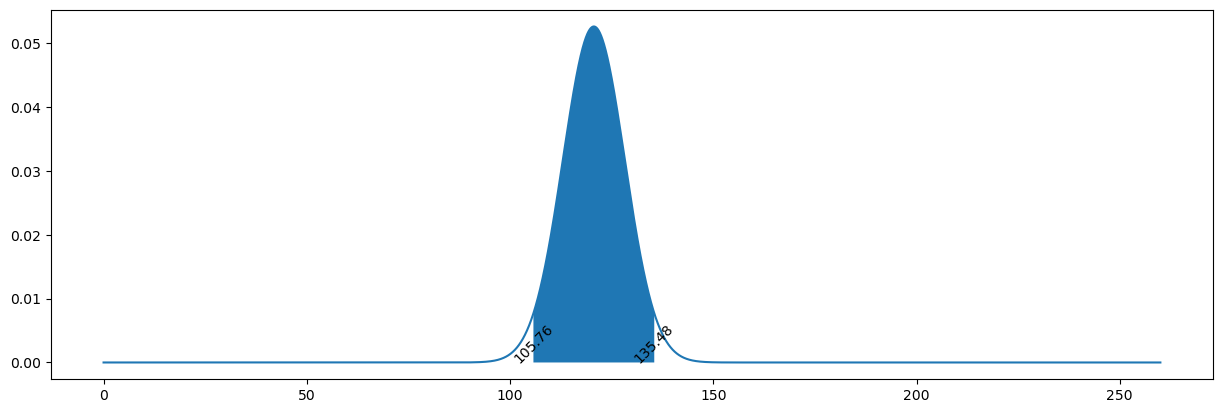

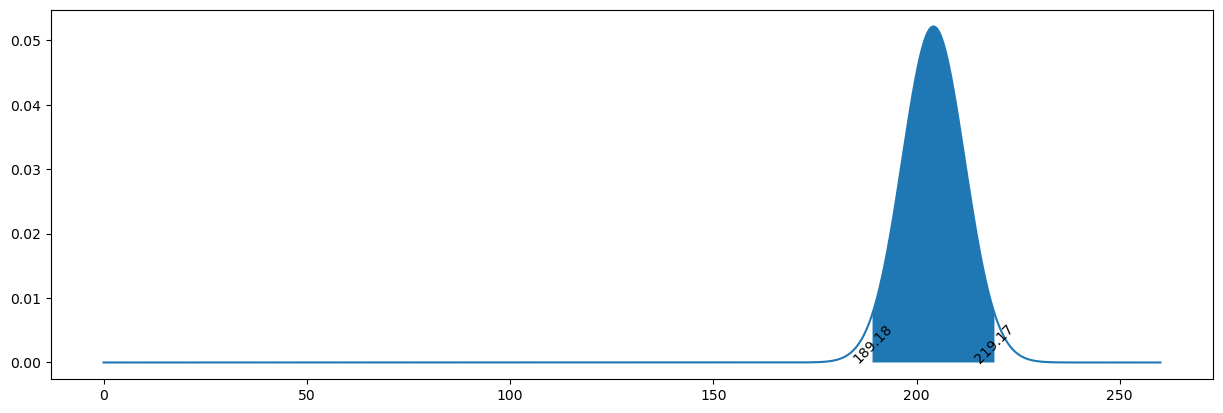

In [84]:
for i, cluster in enumerate(clusters):
    plot_normal_distribution(cluster.mean(), cluster.std(), 0.95)

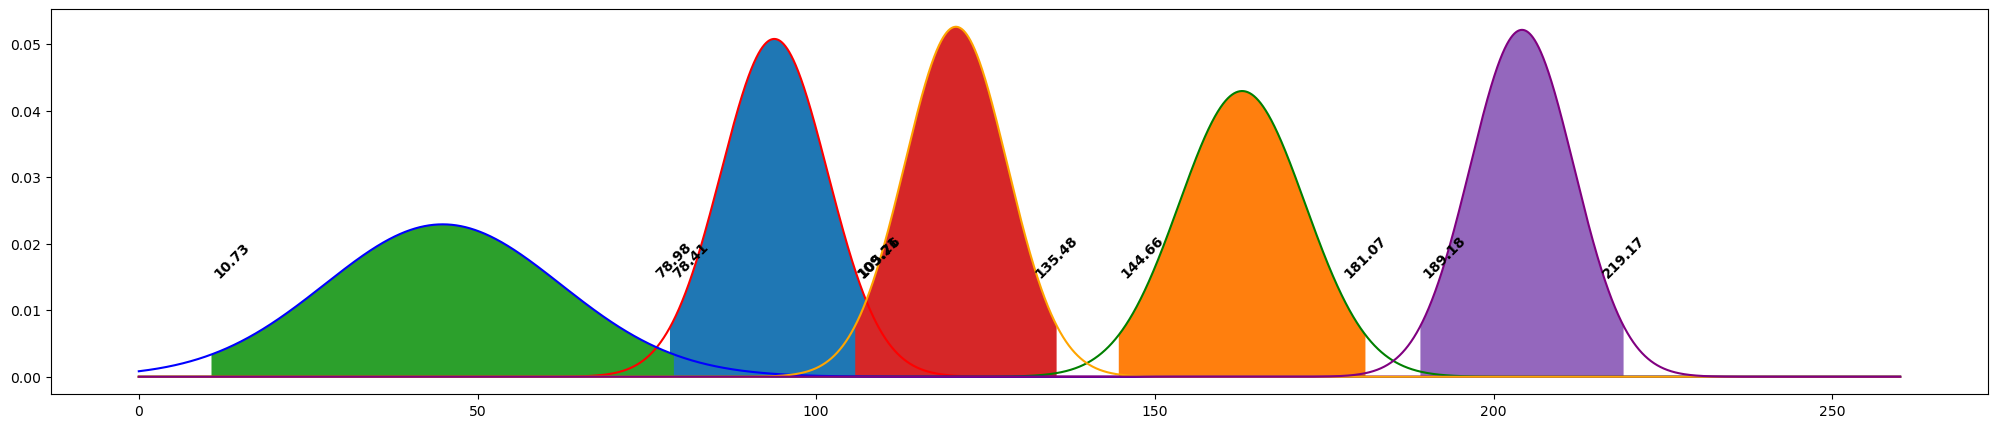

In [85]:
def plot_normal_distribution(mean, std, ci, color):
    x_axis = np.arange(0, 260, 0.001)
    pdf = stats.norm.pdf(x_axis, mean, std)

    ax.plot(x_axis, pdf, color=color)

    std_lim = stats.norm.ppf(1 - (1 - ci) / 2) # 95% CI
    low = mean - std_lim * std
    high = mean + std_lim * std

    ax.fill_between(x_axis, pdf, where=(low < x_axis) & (x_axis < high))
    ax.text(low, 0.015, f'{low:.2f}', ha='left', fontweight='bold', rotation=45)
    ax.text(high, 0.015, f'{high:.2f}', ha='center', fontweight='bold', rotation=45)

fig, ax = plt.subplots(figsize=(25, 5))

colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

for i, cluster in enumerate(clusters):
    plot_normal_distribution(cluster.mean(), cluster.std(), 0.95, colors[i % len(colors)])

plt.show()